In [1]:
#Import CIFAR 10 Dataset and other required packages
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

In [3]:
# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

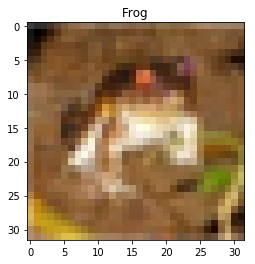

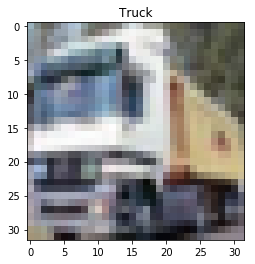

In [4]:
# Loop through each picture in the data set
for i in range(2):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with one element set to 1 and and the rest set to 0.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Create a Model and add Neural network layers

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# Print a summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [10]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 382s 8ms/step - loss: 1.5309 - acc: 0.4412 - val_loss: 1.2094 - val_acc: 0.5622
Epoch 2/30
50000/50000 [==============================] - 381s 8ms/step - loss: 1.1668 - acc: 0.5844 - val_loss: 1.0277 - val_acc: 0.6384
Epoch 3/30
50000/50000 [==============================] - 383s 8ms/step - loss: 1.0080 - acc: 0.6439 - val_loss: 0.9153 - val_acc: 0.6822
Epoch 4/30
50000/50000 [==============================] - 379s 8ms/step - loss: 0.9122 - acc: 0.6813 - val_loss: 0.8150 - val_acc: 0.7148
Epoch 5/30
50000/50000 [==============================] - 373s 7ms/step - loss: 0.8378 - acc: 0.7068 - val_loss: 0.7536 - val_acc: 0.7363
Epoch 6/30
50000/50000 [==============================] - 372s 7ms/step - loss: 0.7894 - acc: 0.7217 - val_loss: 0.7993 - val_acc: 0.7232
Epoch 7/30
50000/50000 [==============================] - 374s 7ms/step - loss: 0.7518 - acc: 0.7383 - val_loss: 0.7467 - 

# Model Prediction 

In [18]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("car.png", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# Get the name of the most likely class
class_label = cifar10_class_names[most_likely_class_index]

# Print the result
print("This image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood*100))

This image is a Car - Likelihood: 100.000000


In [13]:
# Save neural network structure
model_structure = model.to_json()
f = Path("CIFAR_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("CIFAR_model_weights.h5")

In [10]:
# Load the json file that contains the model's structure
from keras.models import model_from_json

f = Path("CIFAR_model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("CIFAR_model_weights.h5")